In [1]:
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
from unidecode import unidecode

import os
import zipfile
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
import fiona
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [2]:
list_result_files = os.listdir("../output")

In [3]:
list_result_files

['Results_0.csv',
 'Results_finales_10000.csv',
 'Results_finales_10000_1.csv',
 'Results_finales_10000_2.csv',
 'Results_finales_10000_3.csv',
 'Results_finales_10000_4.csv',
 'Results_finales_10000_5.csv',
 'Results_finales_15000.csv',
 'Results_finales_15000_1.csv',
 'Results_finales_15000_2.csv',
 'Results_finales_15000_3.csv',
 'Results_finales_15000_4.csv',
 'Results_finales_15000_5.csv',
 'Results_finales_19999.csv',
 'Results_finales_20000.csv',
 'Results_finales_20000_1.csv',
 'Results_finales_20000_2.csv',
 'Results_finales_20000_3.csv',
 'Results_finales_20000_4.csv',
 'Results_finales_21999_3.csv',
 'Results_finales_25000.csv',
 'Results_finales_25000_1.csv',
 'Results_finales_25000_2.csv',
 'Results_finales_25000_4.csv',
 'Results_finales_30000.csv',
 'Results_finales_30000_1.csv',
 'Results_finales_30000_2.csv',
 'Results_finales_31999_4.csv',
 'Results_finales_32999_3.csv',
 'Results_finales_33247.csv',
 'Results_finales_35000_1.csv',
 'Results_finales_35000_2.csv',
 'Re

In [4]:
df_list_results = [pd.read_csv("../output/" + str(x)) for x in [x for x in list_result_files if "Results_finales" in str(x)]]

for i, x in enumerate(df_list_results):
    df_list_results[i].columns = ["address", "Latitude_arcgis", "Longitude_arcgis", "Confidence_arcgis", "latitude_nominatim", "longitude_nominatim", "Consecutivo"]
    #df_list_results = [df.columns = ["address", "Latitude_arcgis", "Longitude_arcgis", "Confidence_arcgis", "latitude_nominatim", "longitude_nominatim"] for df in df_list_results]

In [5]:
df_final_georef = pd.concat(df_list_results, axis = 0)

df_final_georef = df_final_georef.drop_duplicates()

df_final_georef = df_final_georef.sort_values(["address", "Confidence_arcgis"], ascending=[True, False]).drop_duplicates(["address"]).reset_index()
#print(df_final_georef.head())
print(df_final_georef.shape)
df_final_georef

df_final_georef.reset_index().drop("index", axis = 1)[(df_final_georef["address"].notnull()) & (df_final_georef["Latitude_arcgis"].notnull())]
# Split the 'Column' into three parts from the end
df_final_georef["address"] = df_final_georef["address"].str.replace(", BOGOTÁ, D.C.", ", BOGOTÁ D.C.").astype(str).apply(lambda x: unidecode(x))
df_final_georef["address"] = df_final_georef["address"].str.replace(", BOGOTA, D.C.", ", BOGOTA D.C.").astype(str).apply(lambda x: unidecode(x))

df_final_georef[['Direccion', 'Municipio', 'Departamento']] = df_final_georef['address'].astype(str).str.rsplit(',', n=2, expand=True)

df_final_georef['Municipio'] = df_final_georef['Municipio'].astype(str).str.strip()
df_final_georef['Departamento'] = df_final_georef['Departamento'].astype(str).str.strip()

df_final_georef['Municipio'] = df_final_georef['Municipio'].str.replace("BOGOTÁ D.C.", "BOGOTÁ, D.C.").astype(str).apply(lambda x: unidecode(x))
df_final_georef['Departamento'] = df_final_georef['Departamento'].str.replace("BOGOTÁ D.C.", "BOGOTÁ, D.C.").astype(str).apply(lambda x: unidecode(x))


df_final_georef.head()

(174562, 8)


,index,address,Latitude_arcgis,Longitude_arcgis,Confidence_arcgis,latitude_nominatim,longitude_nominatim,Consecutivo,Direccion,Municipio,Departamento
0,0,", ACACIAS, META",3.99116,-73.76388,1.0,3.988732,-73.767432,0,,ACACIAS,META
1,1,", ANAPOIMA, CUNDINAMARCA",4.57023,-74.52709,2.0,4.549301,-74.535912,1,,ANAPOIMA,CUNDINAMARCA
2,2,", ARMENIA, QUINDIO",4.53020,-75.68833,1.0,4.536307,-75.672375,2,,ARMENIA,QUINDIO
3,4,", BARRANQUILLA, ATLANTICO",10.98268,-74.83019,1.0,10.993870,-74.792718,4,,BARRANQUILLA,ATLANTICO
4,6,", BOGOTA D.C., BOGOTA D.C.",4.61496,-74.06941,1.0,4.672654,-74.058184,6,,BOGOTA D.C.,BOGOTA D.C.


In [6]:
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "CARTAGENA DE INDIAS"), "Departamento"] = "BOLIVAR"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "MEDELLIN"), "Departamento"] = "ANTIOQUIA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "PEREIRA"), "Departamento"] = "RISARALDA"

# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "VILLAVICENCIO"), "Departamento"] = "META"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "JAMUNDI"), "Departamento"] = "VALLE DEL CAUCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "BARRANQUILLA"), "Departamento"] = "ATLANTICO"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "SOACHA"), "Departamento"] = "CUNDINAMARCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "DOSQUEBRADAS"), "Departamento"] = "RISARALDA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "PALMIRA"), "Departamento"] = "VALLE DEL CAUCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "MANIZALES"), "Departamento"] = "CALDAS"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "VALLEDUPAR"), "Departamento"] = "CESAR"


df_final_georef.loc[(df_final_georef["Municipio"] == "SAN JOSE DE CUCUTA"), "Municipio"] = "CUCUTA"
#df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "SAN JOSE DE CUCUTA"), "Municipio"] = "CUCUTA"

#df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"].str.contains("CUCUTA"))]


#df_final_georef.loc[(df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")]


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
divipola = pd.read_excel("../input/CODIGOS_DIVIPOLA.xlsx", "Listado Vigentes")

divipola["Nombre Municipio"] = divipola["Nombre Municipio"].astype(str).str.strip().apply(lambda x: unidecode(x))
divipola["Nombre Departamento"] = divipola["Nombre Departamento"].astype(str).str.strip().apply(lambda x: unidecode(x))

divipola["Código Municipio"] = divipola["Código Municipio"].astype(int).apply(round)
divipola["Código Departamento"] = divipola["Código Departamento"].astype(int).apply(round)


In [9]:
divipola_nodupkey = divipola[["Nombre Municipio", "Nombre Departamento"]].drop_duplicates()

Municipality = df_final_georef[(df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")][["Municipio"]].drop_duplicates()

divipola_nodupkey = divipola_nodupkey[divipola_nodupkey["Nombre Municipio"].isin(Municipality["Municipio"].to_list())].drop_duplicates(["Nombre Municipio"])

df_final_georef = pd.merge(df_final_georef, divipola_nodupkey, how = "left", left_on = ["Municipio"], right_on = ["Nombre Municipio"])
#.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "BOGOTA, D.C."), "Departamento"] = "BOGOTA, D.C."

In [10]:
df_final_georef.columns

Index(['index', 'address', 'Latitude_arcgis', 'Longitude_arcgis',
       'Confidence_arcgis', 'latitude_nominatim', 'longitude_nominatim',
       'Consecutivo', 'Direccion', 'Municipio', 'Departamento',
       'Nombre Municipio', 'Nombre Departamento'],
      dtype='object')

In [10]:
df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")), "Departamento"] = df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")), "Nombre Departamento"]

df_final_georef.drop(["Nombre Municipio","Nombre Departamento"], axis = 1,inplace = True)

In [11]:
df_final_georef_2 = pd.merge(df_final_georef, divipola[["Código Departamento","Código Municipio","Nombre Departamento","Nombre Municipio"]].drop_duplicates(), how = "left", left_on = ['Municipio', 'Departamento'], right_on = ["Nombre Municipio", "Nombre Departamento"])
df_final_georef_2[["Código Municipio", "Código Departamento"]] = df_final_georef_2[["Código Municipio", "Código Departamento"]].fillna(0)

df_final_georef_2["Código Municipio"] = df_final_georef_2["Código Municipio"].astype(int).apply(round)
df_final_georef_2["Código Departamento"] = df_final_georef_2["Código Departamento"].astype(int).apply(round)
df_final_georef_2.drop(["Nombre Municipio","Nombre Departamento"], axis = 1,inplace = True)
df_final_georef_2.head()

df_final_georef_2 = df_final_georef_2[(df_final_georef_2["Longitude_arcgis"].notnull()) & (df_final_georef_2["Latitude_arcgis"].notnull()) & (df_final_georef_2["Confidence_arcgis"] >= 8)]

In [12]:

# folder_path_or = "2022_12/shp/"
# list_of_files = os.listdir(folder_path_or)

# for folder_path in ["2022_12/shp/" + x for x in list_of_files]:
#     # Loop through all the files in the folder
#     for file_name in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file_name)

#         # Check if the file is a zip file
#         if file_name.endswith('.zip'):
#             # Open the zip file
#             with zipfile.ZipFile(file_path, 'r') as zip_ref:
#                 # Extract all the contents to the same folder
#                 zip_ref.extractall(folder_path)



In [ ]:
gdb = gpd.read_file("2022_12/shp/25/R_VEREDA/R_VEREDA.shp")
gdb_u_manzana = gpd.read_file("2022_12/shp/25/U_MANZANA/U_MANZANA.shp")
# Transform the coordinate system to EPSG:4326 (WGS84)
gdb = gdb.to_crs("EPSG:4326")
gdb_u_manzana = gdb_u_manzana.to_crs("EPSG:4326")

df_to_plot = df_final_georef_2[(df_final_georef_2["Código Departamento"].astype(int) == int(25)) & (df_final_georef_2["Longitude_arcgis"].notnull()) & (df_final_georef_2["Latitude_arcgis"].notnull())]

# Convert DataFrame to GeoDataFrame
points = gpd.GeoDataFrame(df_to_plot, geometry=gpd.points_from_xy(df_to_plot.Longitude_arcgis, df_to_plot.Latitude_arcgis))

# Check the transformed CRS
#print(gdb_2.crs)
# Create a plot
fig, ax = plt.subplots(figsize=(20, 17))

#plt.scatter(x = df_to_plot["Longitude_arcgis"], y = df_to_plot["Latitude_arcgis"])

# Plot the GeoDataFrame
ax.set_ylim(3.5, 6)
ax.set_xlim(-75, -73.5)
gdb.plot(ax=ax, color='blue', edgecolor='black', alpha = 0.5)
gdb_u_manzana.plot(ax=ax, color='red', edgecolor='black', alpha = 0.8)
points.plot(ax=ax, color='black', markersize =12)

# Add a title to the plot
ax.set_title('')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Display the plot
plt.show()



In [ ]:
#df_final_georef_2[(df_final_georef_2["Código Departamento"] == 25) & (df_final_georef_2["Longitude_arcgis"]>-50)].to_csv("Ejemplo.csv")

def function_join_shp(dpto):
    df_to_plot = df_final_georef_2[(df_final_georef_2["Código Departamento"].astype(int) == int(dpto))]

    # Convert DataFrame to GeoDataFrame
    points = gpd.GeoDataFrame(df_to_plot, geometry=gpd.points_from_xy(df_to_plot.Longitude_arcgis, df_to_plot.Latitude_arcgis))

    if "U_TERRENO" in os.listdir("../2022_12/shp/"+str(dpto)):
        gdb_u_terreno = gpd.read_file("../2022_12/shp/"+str(dpto) +"/U_TERRENO/U_TERRENO.shp")
        gdb_u_terreno["CAPA"] = "TERRENO"
    else:
        gdb_u_terreno = gpd.read_file("../2022_12/shp/"+str(dpto) +"/U_MANZANA/U_MANZANA.shp")
        gdb_u_terreno["CAPA"] = "MANZANA"

    if "R_TERRENO" in os.listdir("../2022_12/shp/"+str(dpto)):
        gdb_r_terreno = gpd.read_file("../2022_12/shp/"+str(dpto) +"/R_TERRENO/R_TERRENO.shp")
        gdb_r_terreno["CAPA"] = "TERRENO"
    else:
        gdb_r_terreno = gpd.read_file("../2022_12/shp/"+str(dpto) +"/R_VEREDA/R_VEREDA.shp")
        gdb_r_terreno["CAPA"] = "TERRENO"

    
    
    # Transform the coordinate system to EPSG:4326 (WGS84)
    gdb_r_terreno = gdb_r_terreno.to_crs("EPSG:4326")
    gdb_u_terreno = gdb_u_terreno.to_crs("EPSG:4326")

    joined_r = gpd.sjoin(points, gdb_r_terreno, how='left', op='within')
    joined_u = gpd.sjoin(points, gdb_u_terreno, how='left', op='within')

    points_nearest_u = gpd.sjoin_nearest(points, gdb_u_terreno, distance_col="distances", how="left")
    points_nearest_r = gpd.sjoin_nearest(points, gdb_r_terreno, distance_col="distances", how="left")

    joined_r_df = joined_r[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA']].rename(columns = {'CODIGO' : "CODIGO_RURAL", 'CODIGO_ANT' : "CODIGO_ANT_RURAL", 'CAPA' : 'CAPA_RURAL'})
    joined_u_df = joined_u[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA']].rename(columns = {'CODIGO' : "CODIGO_URBANO", 'CODIGO_ANT' : "CODIGO_ANT_URBANO", 'CAPA' : 'CAPA_URBANO'})
    points_nearest_r_df = points_nearest_r[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA', "distances"]].rename(columns = {'CODIGO' : "CODIGO_RURAL_APROX", 'CODIGO_ANT' : "CODIGO_ANT_RURAL_APROX", 'CAPA' : 'CAPA_RURAL_APROX', "distances" : "Distancia_rural"}).sort_values(["Consecutivo", "address", "Confidence_arcgis", "Distancia_rural"], ascending=[True,True,False, True]).drop_duplicates(["Consecutivo", "address"])
    points_nearest_u_df = points_nearest_u[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA', "distances"]].rename(columns = {'CODIGO' : "CODIGO_URBANO_APROX", 'CODIGO_ANT' : "CODIGO_ANT_URBANO_APROX", 'CAPA' : 'CAPA_URBANO_APROX', "distances" : "Distancia_urbano"}).sort_values(["Consecutivo", "address", "Confidence_arcgis", "Distancia_urbano"], ascending=[True,True,False, True]).drop_duplicates(["Consecutivo", "address"])

    df_final = pd.merge(
        pd.merge(
            pd.merge(joined_r_df, joined_u_df[["address", "CODIGO_URBANO","CODIGO_ANT_URBANO",'CAPA_URBANO']], on = ["address"], how = "left"),
        points_nearest_r_df[["address", "CODIGO_RURAL_APROX","CODIGO_ANT_RURAL_APROX",'CAPA_RURAL_APROX', "Distancia_rural"]], on = ["address"], how = "left"),
    points_nearest_u_df[["address", "CODIGO_URBANO_APROX","CODIGO_ANT_URBANO_APROX",'CAPA_URBANO_APROX', "Distancia_urbano"]], on = ["address"], how = "left")


    df_final["Distancia_rural"].fillna(500, inplace = True)
    df_final["Distancia_urbano"].fillna(500, inplace = True)
    
    
    dict_result = {}
    dict_result["cruce_rural"] = joined_r
    dict_result["cruce_urbano"] = joined_u
    dict_result["mas_cercano_rural"] = points_nearest_r
    dict_result["mas_cercano_urbano"] = points_nearest_u
    dict_result["df_final"] = df_final


    return dict_result

#dpto = 25
dict_overall_results = {}
for dpto in os.listdir("../2022_12/shp/"):
    dict_overall_results[str(dpto)] = function_join_shp(str(dpto))


In [15]:
#print(dict_overall_results["08"]["df_final"].shape)
#dict_overall_results
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA'
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA', "distances"
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA', "distances"
vars = ['CODIGO_RURAL','CODIGO_ANT_RURAL', 'CODIGO_URBANO', 'CODIGO_ANT_URBANO','CAPA_URBANO', 'CODIGO_RURAL_APROX', 'CODIGO_ANT_RURAL_APROX','CAPA_RURAL_APROX', 'Distancia_rural', 'CODIGO_URBANO_APROX','CODIGO_ANT_URBANO_APROX', 'CAPA_URBANO_APROX', 'Distancia_urbano']
#'CAPA_RURAL', 
#CAPA_URBANO
#CAPA_RURAL_APROX
#CAPA_URBANO_APROX
df_final = []
for key_ in dict_overall_results.keys():

    df = dict_overall_results[key_]["df_final"].copy()
    df.loc[(dict_overall_results[key_]["df_final"]["CODIGO_RURAL"].isnull()) & (dict_overall_results[key_]["df_final"]["CODIGO_URBANO"].notnull()), vars]
    df["CODIGO_PREDIAL"] = None
    df["CAPA_GEOGRAFICA"] = None
    df["ZONA"] = None
    df.loc[df["CODIGO_RURAL"].notnull(), "CAPA_GEOGRAFICA"] = df.loc[df["CODIGO_RURAL"].notnull(), "CAPA_RURAL"]
    df.loc[df["CODIGO_RURAL"].notnull(), "CODIGO_PREDIAL"] = df.loc[df["CODIGO_RURAL"].notnull(), "CODIGO_RURAL"]
    df.loc[df["CODIGO_RURAL"].notnull(), "ZONA"] = "RURAL"


    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "ZONA"] = "URBANO"
    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CAPA_URBANO"]
    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CODIGO_URBANO"]

    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "ZONA"] = "RURAL_APROX"
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] < df["Distancia_urbano"]), "CAPA_RURAL_APROX"]
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] < df["Distancia_urbano"]), "CODIGO_RURAL_APROX"]
    
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "ZONA"] = "URBANA_APROX"
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] > df["Distancia_urbano"]), "CAPA_URBANO_APROX"]
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] > df["Distancia_urbano"]), "CODIGO_URBANO_APROX"]


    df["Distancia_final"] = np.nan
    df.loc[df["ZONA"] == "URBANA_APROX", "Distancia_final"] = df.loc[df["ZONA"] == "URBANA_APROX", "Distancia_urbano"]
    df.loc[df["ZONA"] == "RURAL_APROX", "Distancia_final"] = df.loc[df["ZONA"] == "RURAL_APROX", "Distancia_rural"]
    df["TIPO_GEORREF"] = "EXACTA"
    df.loc[df["ZONA"].isin(["RURAL_APROX", "URBANA_APROX"]), "TIPO_GEORREF"] = "APROX"
    df_final.append(df)

In [17]:
df_final_1 = pd.concat(df_final, axis = 0)
df_final_1["ZONA"].value_counts()

ZONA
RURAL_APROX     57395
URBANA_APROX    21160
URBANO          10189
RURAL             603
Name: count, dtype: int64

In [20]:
pd.set_option('display.max_columns', None)
df_final_1.loc[df_final_1["Distancia_urbano"] == 500, "Distancia_urbano"] = None
df_final_1.loc[df_final_1["Distancia_rural"] == 500, "Distancia_urbano"] = None

In [37]:
quantiles = [0.05,0.1, 0.2,0.25, 0.5, 0.75, 0.9, 0.95]
#df[df["TIPO_GEORREF"] == "APROX"]["Distancia_final"].quantile(quantiles)
df_final_1[df_final_1["ZONA"] == "RURAL_APROX"]["Distancia_final"].quantile(quantiles)



0.05    0.009346
0.10    0.020436
0.20    0.038937
0.25    0.045807
0.50    0.079625
0.75    0.188173
0.90    0.223496
0.95    0.233235
Name: Distancia_final, dtype: float64

In [18]:
df_final_1[df_final_1["ZONA"] == "URBANA_APROX"]["Distancia_final"].quantile(quantiles)


0.05    0.000006
0.10    0.000015
0.20    0.000030
0.25    0.000037
0.50    0.000073
0.75    0.008543
0.90    0.019833
0.95    0.031095
Name: Distancia_final, dtype: float64

In [211]:
df_final_1.columns

Index(['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis',
       'Consecutivo', 'Direccion', 'Municipio', 'Departamento',
       'Código Departamento', 'Código Municipio', 'CODIGO_RURAL',
       'CODIGO_ANT_RURAL', 'CAPA_RURAL', 'CODIGO_URBANO', 'CODIGO_ANT_URBANO',
       'CAPA_URBANO', 'CODIGO_RURAL_APROX', 'CODIGO_ANT_RURAL_APROX',
       'CAPA_RURAL_APROX', 'Distancia_rural', 'CODIGO_URBANO_APROX',
       'CODIGO_ANT_URBANO_APROX', 'CAPA_URBANO_APROX', 'Distancia_urbano',
       'CODIGO_PREDIAL', 'CAPA_GEOGRAFICA', 'ZONA', 'Distancia_final',
       'TIPO_GEORREF'],
      dtype='object')

In [212]:
df_final_1.loc[df_final_1["ZONA"] == "RURAL", ["Latitude_arcgis", "Longitude_arcgis", "CODIGO_RURAL"]]

,Latitude_arcgis,Longitude_arcgis,CODIGO_RURAL
85,10.792307,-74.764555,086340002000000000023000000000
301,10.266670,-75.466670,138380001000000010360000000000
302,10.266670,-75.466670,138380001000000010360000000000
631,10.315560,-75.439980,138360001000000010444000000000
633,10.315560,-75.439980,138360001000000010444000000000
...,...,...,...
665,4.809005,-72.269931,851390001000000040170000000000
1111,5.161250,-72.546863,850100000000000010466000000000
1137,5.353010,-71.667340,853250000000000200008000000000
1176,5.330041,-72.409741,850010001000000190407000000000


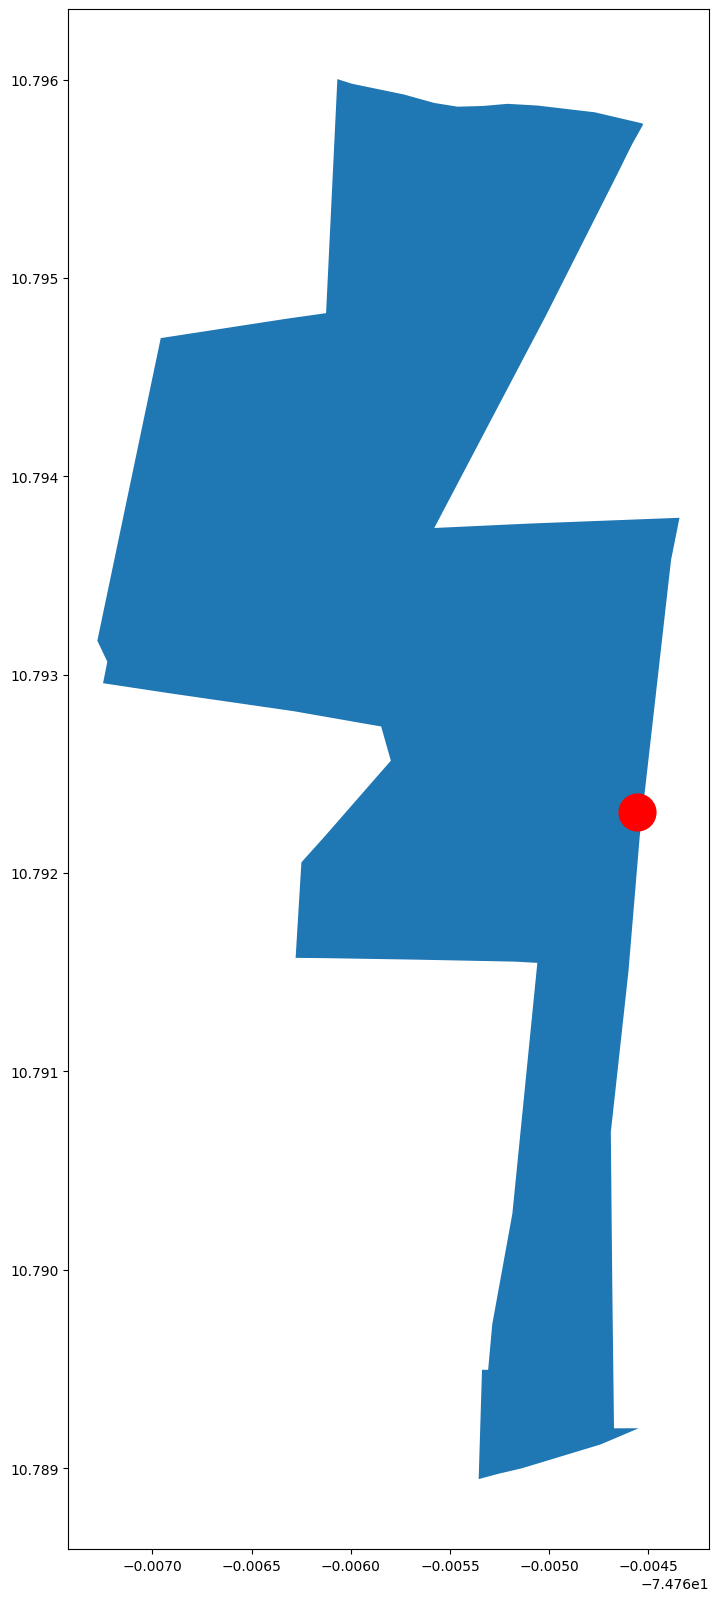

In [230]:
#df_final_1[df_final_1["ZONA"] == "RURAL"]

gdb = gpd.read_file("2022_12/shp/08/R_TERRENO/R_TERRENO.shp")
gdb = gdb.to_crs("EPSG:4326")
df_example = pd.DataFrame({"long" : [-74.764555]	, "lati": [10.792307]})
example_distances = gpd.GeoDataFrame(df_example, geometry=gpd.points_from_xy(df_example.long, df_example.lati))

fig, ax = plt.subplots(figsize=(15, 20))
gdb[gdb["CODIGO"] == "086340002000000000023000000000"].plot(ax=ax)
example_distances.plot(ax=ax, color = "red", markersize = 700)
plt.show()

In [23]:
divipola = pd.read_excel("../input/CODIGOS_DIVIPOLA.xlsx", "Listado Vigentes")

divipola["Nombre Municipio"] = divipola["Nombre Municipio"].astype(str).str.strip().apply(lambda x: unidecode(x))
divipola["Nombre Departamento"] = divipola["Nombre Departamento"].astype(str).str.strip().apply(lambda x: unidecode(x))

divipola["Código Municipio"] = divipola["Código Municipio"].astype(str).str.zfill(5)
divipola["Código Departamento"] = divipola["Código Departamento"].astype(str).str.zfill(2)

In [24]:
ofertas = pd.read_excel("../input/24052023_Consolidado_Avaluos.xlsx", "Hoja1")


# Function to count consecutive letters and numbers without spaces
def count_consecutive_alphanumeric(text):
    consecutive_alphanumeric = re.findall(r'[a-zA-Z0-9]+', text)
    max_length = max(len(word) for word in consecutive_alphanumeric)
    return max_length

# Function to insert spaces into the code
def insert_spaces(code):
    pattern = r'(\d+|\D+)'
    spaced_code = re.sub(pattern, r'\1 ', code).strip()
    return spaced_code

pattern = r'[^a-zA-Z0-9]'
# Assuming 'df' is your DataFrame and 'Direccion' is the column name

ofertas['Direccion1'] = ofertas['Direccion'].astype(str).str.replace('AP\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('APT\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('AP\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('APT\d+', ' ', regex = True)

ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('CS\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('CS\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('CASA\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('CASA\d+', ' ', regex = True)

ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('TO\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('TO\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('TORRE\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('TORRE\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('ETP\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('ETP\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('ET\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('ET\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BLQ\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BLQ\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BL\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BL\d+', ' ', regex = True)


ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.endswith('000')), "Municipio"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.endswith('000')), "Municipio"].str.replace("000$", "", regex = True)
ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Departamento"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Departamento"].str.zfill(2)
ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.len() <= 3), "Municipio"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.len() <= 3), "Municipio"].str.zfill(3)
ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.len() <= 3), "Municipio"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.len() <= 3), "Departamento"].astype(str) + ofertas.loc[(ofertas["Departamento_nombre"].isnull()) & (ofertas["Municipio"].str.len() <= 3), "Municipio"].astype(str)
ofertas["Municipio"] = ofertas["Municipio"].astype(str)
ofertas["Departamento"] = ofertas["Departamento"].astype(str)

# Replace the cases with four or more consecutive zeroes with a different value
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(r'\d{5,}', '')

ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BL\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BL\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BLOQUE\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace('BLOQUE\d+', ' ', regex = True)

ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.extract(r'(\D*\d+\D*\d+\D*\d+)')
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace(pattern, ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace(" NO ", ' ')
ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.replace(' N ', ' ')

print(ofertas.shape)
ofertas = pd.merge(ofertas, divipola[["Código Municipio", "Nombre Municipio", "Nombre Departamento"]].drop_duplicates(), how = "left", left_on = ["Municipio"], right_on = ["Código Municipio"])
print(ofertas.shape)

ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Municipio_nombre"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Nombre Municipio"]
ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Departamento_nombre"] = ofertas.loc[(ofertas["Departamento_nombre"].isnull()), "Nombre Departamento"]

ofertas['Direccion1'] = ofertas['Direccion1'].astype(str).str.strip().apply(lambda x: unidecode(x))
ofertas["Direccion1"] = ofertas["Direccion1"].apply(insert_spaces)
ofertas['Direccion2'] = ofertas['Direccion1'].astype(str) + ", " +ofertas['Municipio_nombre'].astype(str) + ", " + ofertas["Departamento_nombre"].astype(str)
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).str.replace(', BOGOTÁ, D.C., BOGOTÁ, D.C.', ', BOGOTÁ D.C.')
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).str.replace(', BOGOTA, D.C., BOGOTA, D.C.', ', BOGOTA D.C.')
ofertas['Direccion2'] = ofertas['Direccion2'].str.upper().str.strip()
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).str.strip().apply(lambda x: unidecode(x))
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).str.replace(' , ', ', ')
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).str.replace('\t', '')
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).apply(lambda x: re.sub(r'\s{2,}', ' ', x.strip()))





(503493, 30)
(503493, 33)


In [25]:
#df_final_georef_2["address"].head(50)
#df_address_or[~df_address_or["addresses_or"].isin(df_final_georef_2["address"])]
#x = df_final_1[~df_final_1["address"].isin(sorted_list)]["address"]
#x.shape

ofertas["Direccion2"] = ofertas["Direccion2"].astype(str)
df_final_1["address"] = df_final_1["address"].astype(str)
ofertas_final = pd.merge(ofertas, df_final_1, left_on = "Direccion2",right_on = "address", how = "left")


In [27]:
#ofertas_final["CODIGO_PREDIAL"].value_counts()
#ofertas_final[ofertas_final["CODIGO_PREDIAL"] == "257400000000000000000000000000"]
ofertas_final.to_csv("../output/230712_RESULTADOS_GEOREF.csv")